## matplotlib.pyplot

matplotlib.pyplot is a collection of command style functions that make matplotlib work like MATLAB. 

Each pyplot function makes some change to a figure: eg, create a figure, create a plotting area in a figure, plot some lines in a plotting area, decorate the plot with labels, etc.... 

matplotlib.pyplot is stateful, in that it keeps track of the current figure and plotting area, and the plotting functions are directed to the current axes

plotting 101
------------
If you provide a single list or array to the plot() command, matplotlib assumes it is a sequence of y values, and automatically generates the x values for you. Since python ranges start with 0, the default x vector has the same length as y but starts with 0. Hence the x data are [0,1,2,3].

In [3]:
%pylab
import numpy as np
import scipy as sp
from numpy import *
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


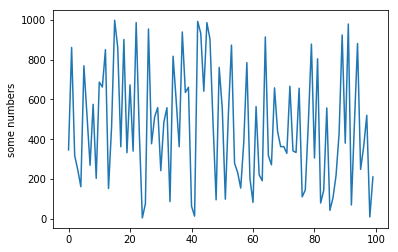

In [1]:
values =  np.random.randint(1,1000,100)
plt.plot(values)
plt.ylabel('some numbers')
plt.show()

plot() is a versatile command, and will take an arbitrary number of arguments. For example, to plot x versus y, you can issue the command:

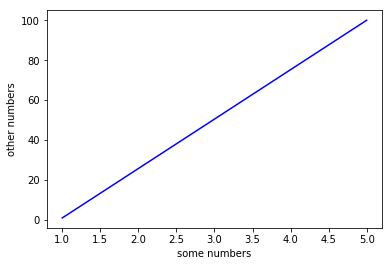

In [5]:
xvals = np.linspace(1.0,5.0,50)
yvals = np.linspace(1,100,50)
plt.plot(xvals, yvals, 'b')
plt.xlabel('some numbers')
plt.ylabel('other numbers')
plt.show()

Styling the plot
----------------
For every x, y pair of arguments, there is an optional third argument which is the format string that indicates the color and line type of the plot. The letters and symbols of the format string are from MATLAB, and you concatenate a color string with a line style string. The default format string is ‘b-‘, which is a solid blue line.

You can also use keyword arguments to specify color, line thickness, etc. E.g. plt.plot(x,y,color='red',linewidth=2.0)


*Markers*

{0: 'tickleft', 1: 'tickright', 2: 'tickup', 3: 'tickdown', 4: 'caretleft', 'D': 'diamond', 6: 'caretup', 7: 'caretdown', 's': 'square', 
'|': 'vline', '': 'nothing', 'None': 'nothing', 'x': 'x', 5: 'caretright', '_': 'hline', '^': 'triangle_up', ' ': 'nothing', 
'd': 'thin_diamond', None: 'nothing', 'h': 'hexagon1', '+': 'plus', '*': 'star', ',': 'pixel', 'o': 'circle', '.': 'point', '1': 
'tri_down', 'p': 'pentagon', '3': 'tri_left', '2': 'tri_up', '4': 'tri_right', 'H': 'hexagon2', 'v': 'triangle_down', '8': 'octagon', 
'<': 'triangle_left', '>': 'triangle_right'}

*Colors*

* b: blue
* g: green
* r: red
* c: cyan
* m: magenta
* y: yellow
* k: black
* w: white

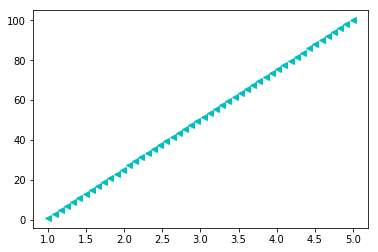

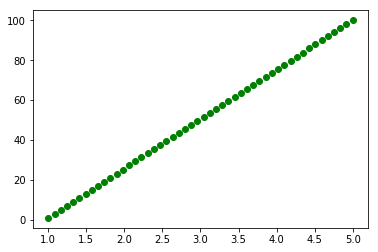

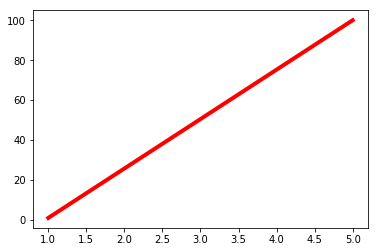

In [6]:
plt.plot(xvals, yvals, 'c<')
plt.show()
plt.plot(xvals, yvals, 'go')
plt.show()
plt.plot(xvals, yvals, color='red', linewidth=4)
plt.show()

## Anatomy of a Matplotlib figure

from http://matplotlib.org/faq/usage_faq.html#parts-of-a-figure

![Guido](images/anatomy1.png)

Working with multiple figures and axes
--------------------------------------
pyplot has the concept of the current figure and the current axes. All plotting commands apply to the current axes. The function gca() returns the current axes (a matplotlib.axes.Axes instance), and gcf() returns the current figure (matplotlib.figure.Figure instance). Normally, you don’t have to worry about this, because it is all taken care of behind the scenes. Below is a script to create two subplots.

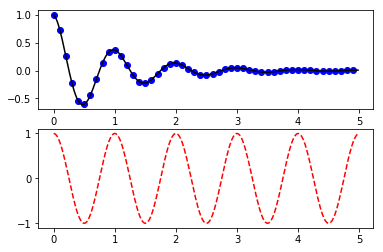

In [7]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

#plt.figure(1)
plt.subplot(211)   #  2 rows, 1 column, Item #1
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)   #  2 rows, 1 column, Item #2
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')

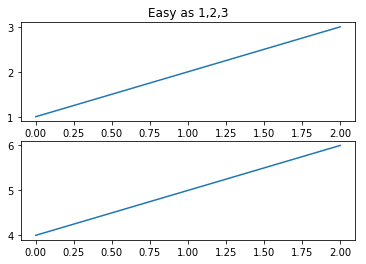

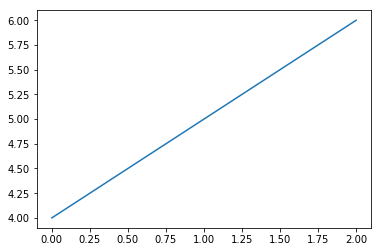

In [8]:
# plt.figure(1)                # the first figure
plt.subplot(2,1,1)             # the first subplot in the first figure (rows, cols, curr)
plt.plot([1,2,3])
plt.subplot(212)             # the second subplot in the first figure (rows, cols, curr)
plt.plot([4,5,6])


plt.figure(2)                # a second figure
plt.plot([4,5,6])            # creates a subplot(111) by default

plt.figure(1)                # figure 1 current; subplot(212) still current
plt.subplot(211)             # make subplot(211) in figure1 current
plt.title('Easy as 1,2,3')   # subplot 211 title

More multiple figures. The arguments to add_subplot are (total_rows, total_cols, plot_number). I.e., 3,3,1 is the first cell and 3,3,9 is the last.

[]

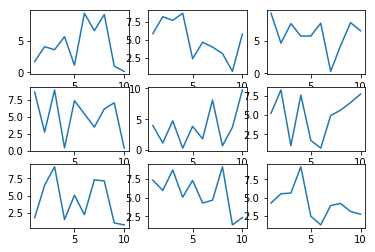

In [9]:
y = np.arange(1,11)
fig = plt.figure()   # get the current figure
for i in range(1,10):
    data = np.random.random_sample((10,)) * 10
    sub = fig.add_subplot(3,3,i)
    sub.plot(y, data)
# fig.savefig('multiplot.pdf', format='pdf')
plt.plot()

Working with text
-----------------
The text() command can be used to add text in an arbitrary location, and the xlabel(), ylabel() and title() are used to add text in the 
indicated locations.

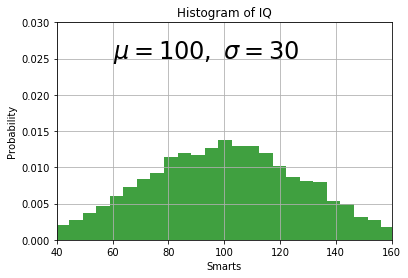

In [7]:
mu, sigma = 100, 30
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, normed=1, facecolor='g', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=%d,\ \sigma=%d$' %(mu, sigma), fontsize=24)
plt.axis([40, 160, 0, 0.03])
plt.grid(True)

Annotations
-----------
A common use case of text is to annotate some feature of the plot, and the annotate() method provides helper functionality to make annotations easy. In an annotation, there are two points to consider: the location being annotated represented by the argument xy and the location of the text xytext. Both of these arguments are (x,y) tuples.

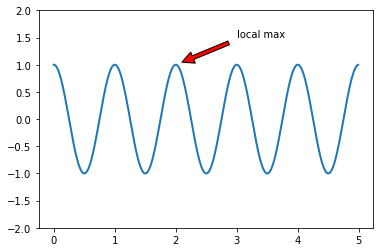

In [8]:
ax = plt.subplot(111)

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = plt.plot(t, s, lw=2)

plt.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
            arrowprops=dict(facecolor='red', shrink=0.1),
            )

plt.ylim(-2,2)
plt.show()

## More styles

There are many builtin styles in addition to the standard style. 

In [9]:
import matplotlib.style as style
style.available

['_classic_test',
 'bmh',
 'classic',
 'dark_background',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn']

### Emulating fivethirtyeight.com

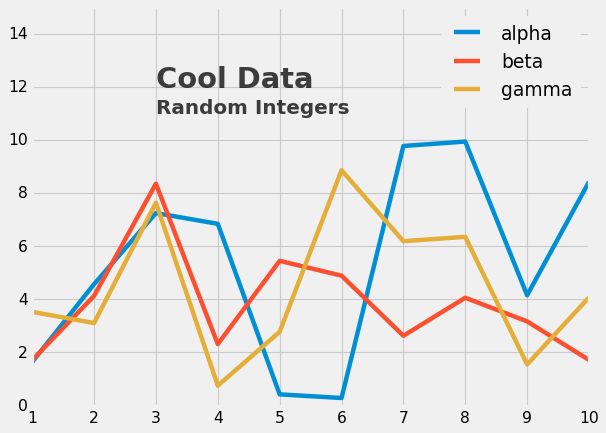

In [14]:
style.use('fivethirtyeight')
titles = ['alpha', 'beta', 'gamma'] #, 'epsilon', 'theta', 'eta', 'zeta']

y = np.arange(1, 11)
for title in titles:
    data = np.random.random_sample((10,)) * 10
    plt.plot(y, data, label=title)
plt.ylim(0, 15)
plt.legend(loc="upper right")
plt.text(x=3, y=12, weight='bold', s="Cool Data", fontsize=26, alpha=.75)
plt.text(x=3, y=11, weight='bold', s="Random Integers", fontsize=18, alpha=.75)
plt.show()

style.use('classic') # revert to normal 


simple curve
------------
matplotlib's approach to plotting functions requires you to compute the x and y vertices of the curves you want to plot and then pass it off to plot. Eg for a normal pdf, matplotlib.mlab provides such a function:

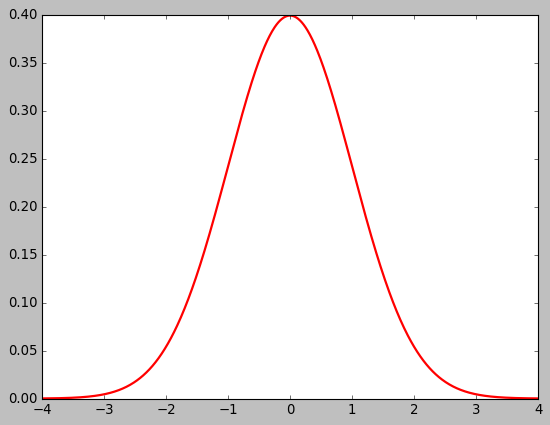

In [11]:
from matplotlib.mlab import normpdf
import numpy as np
import pylab as p

x = np.arange(-4, 4, 0.01)
y = normpdf(x, 0, 1) # unit normal
p.plot(x,y, color='red', lw=2)
p.show()

CIRA NetCDF Example
-------------------
This example plots temperature C vs pressure, with a logarithmic scale for pressure. 

_Thanks to John Knaff and the rest of the class at CIRA for providing data and suggestions_

/Users/jstrick/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/ipykernel_launcher.py:22: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
/Users/jstrick/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/ipykernel_launcher.py:23: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.


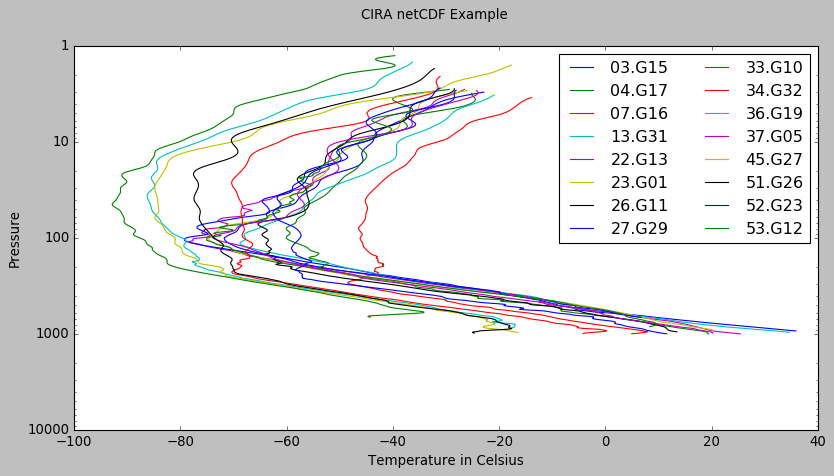

In [12]:
import os
import numpy as np
from matplotlib import pyplot as plt
import netCDF4
from matplotlib.ticker import ScalarFormatter

DATA_DIR = '../DATA/wetprf'

for file_name in sorted(os.listdir(DATA_DIR)):
    if file_name.startswith('wetPrf') :
        plot_label = file_name[24:30]
        full_path = os.path.join(DATA_DIR, file_name)
    
        nc = netCDF4.Dataset(full_path)
    
        temps = nc.variables['Temp'][:]
        pressures = nc.variables['Pres'][:]
        
        temps_mask =  temps.mask
        pressures_mask = pressures.mask
        
        temps[temps_mask] = np.nan
        pressures[pressures_mask] = np.nan
        
        plt.plot(temps, pressures, label=plot_label)

plt.ylabel('Pressure')
plt.xlabel('Temperature in Celsius')
plt.legend(loc="upper right", ncol=2)

fig = plt.gcf()
fig.suptitle("CIRA netCDF Example")
fig.set_size_inches(12, 6)

ax = plt.gca()
ax.set_yscale('log')
ax.invert_yaxis()
ax.yaxis.set_major_formatter(ScalarFormatter())

fig.savefig('cira_netcdf.png',dpi=300)

plt.show()

Justin's MinFluidProcess example
--------------------------------
This was contributed by a student in an earlier class at the DOE research lab in Morganton, WV

Index(['Date', 'Time', 'PT-5030', 'PDT-5090', 'TE-5024', 'TE-5070', 'TE-5071',
       'TE-5072', 'TE-5080', 'TE-5081', 'FTC-1100', 'FTC-2100', 'FTC-3100',
       'FTC-5238', 'PDT-5103', 'PT-5070', 'TE-5082', 'TE-5086'],
      dtype='object')


/Users/jstrick/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in less_equal


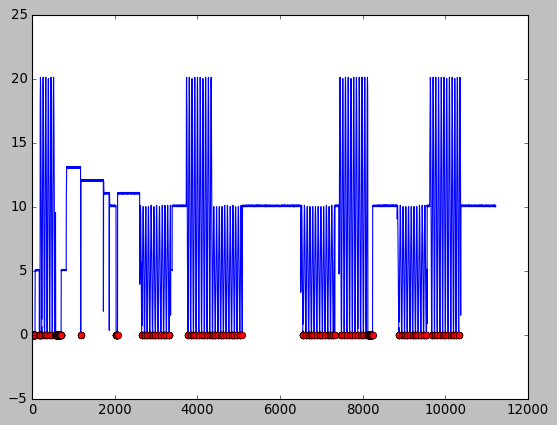

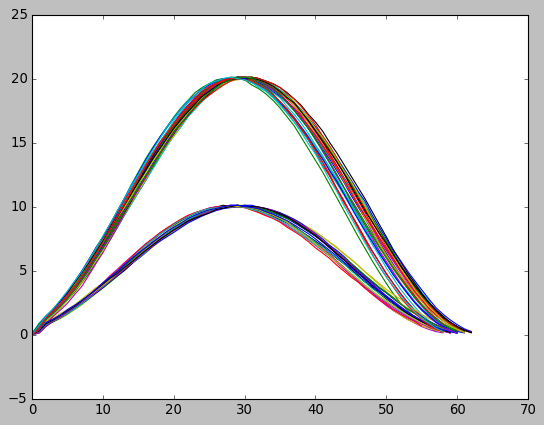

[(303, 362), (366, 424), (428, 488), (491, 551), (2787, 2846), (2851, 2913), (2985, 3045), (3120, 3180), (3186, 3247), (3774, 3836), (3841, 3902), (3906, 3967), (3971, 4033), (4037, 4100), (4104, 4166), (4170, 4231), (4236, 4297), (4301, 4360), (4435, 4495), (4501, 4560), (4566, 4626), (4631, 4693), (4830, 4890), (5029, 5085), (6695, 6755), (6761, 6821), (6826, 6887), (7025, 7085), (7091, 7151), (7157, 7218), (7487, 7549), (7553, 7615), (7619, 7681), (7685, 7747), (7751, 7813), (7817, 7880), (7953, 8014), (8018, 8080), (8947, 9008), (9013, 9074), (9278, 9338), (9344, 9404), (9410, 9471), (9672, 9734), (9738, 9801), (9805, 9866), (9870, 9931), (9935, 9997), (10001, 10064), (10068, 10129), (10133, 10194), (10198, 10257), (10261, 10320)]


In [13]:
import pandas


class MinFluidProcess(object):
    def __init__(self,fname):    
        self.data=pandas.read_csv(fname) 

    def getKeys(self):
        return self.data.keys()
        
    def plot(self,*keys):
        for key in keys:
            plt.plot(self.data[key])
        plt.show()

    def findZeros(self, key, plot=False):
        subData=self.data[key].values
        self.zeros=np.where(subData<=0.1)
        if plot:
            plt.plot(self.data[key])
            plt.plot(self.zeros,range(len(self.zeros)),'ro')
            plt.show()
        
    def split(self, key, plot=False):
        self.findZeros(key,plot)
        goodRanges=[]
        for i in range(len(self.zeros[0])-1):
            if self.zeros[0][i]!=self.zeros[0][i+1]-1:
                intr=(self.zeros[0][i],self.zeros[0][i+1])
                rawWF = self.data[key].values[intr[0]:intr[1]]
                if np.sum(np.isnan(rawWF)) == 0:
                    scaledWF= np.array(rawWF/max(rawWF))
                    scaledX = np.array(range(len(rawWF)))/float(len(rawWF))
                    cosine=np.array([1-(np.cos(2*np.pi*x)+1)/2.0 for x in scaledX])
                    rSquared = np.sum(np.power((scaledWF-cosine),2))
                    if rSquared <=.4:
                        goodRanges.append(intr)
                        if plot:
                            plt.plot(rawWF)

        plt.show()
        return goodRanges


minFluid=MinFluidProcess('../DATA/2013-01-28 072316.csv')
print(minFluid.getKeys())
minFluid.findZeros('FTC-1100')
print(minFluid.split('FTC-1100',plot=True))

Histograms
----------

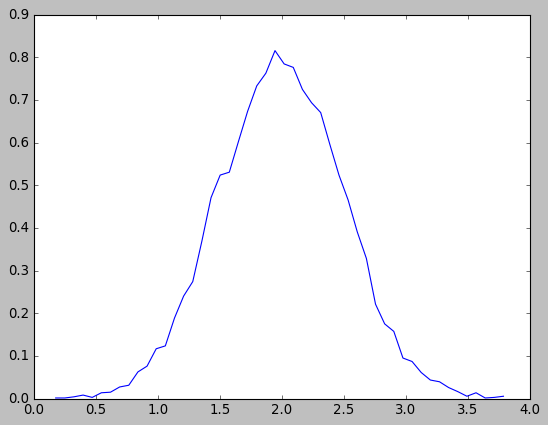

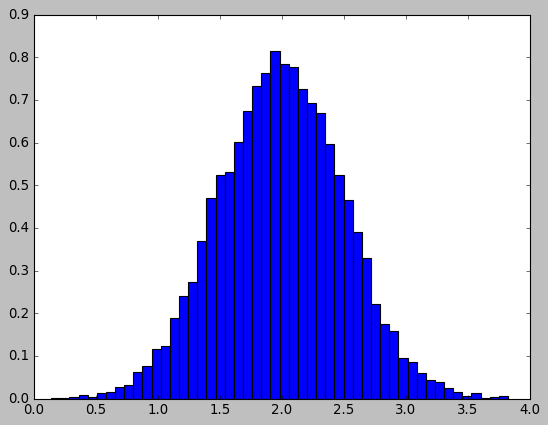

In [14]:
# Build a vector of 10000 normal deviates with variance 0.5^2 and mean 2
mu, sigma = 2, 0.5
v = np.random.normal(mu,sigma,10000)
# Compute the histogram with numpy and then plot it
(n, bins) = np.histogram(v, bins=50, normed=True)  # NumPy version (no plot)
plt.plot(.5*(bins[1:]+bins[:-1]), n)
plt.show()
# Plot a normalized histogram with 50 bins
plt.hist(v, bins=50, normed=1)       # matplotlib version (plot)
plt.show()

Making a pie chart
------------------
Use **plt.pie()**, pass in data + config options. You can set which slices 'explode', or pop out, and set the colors individually. 

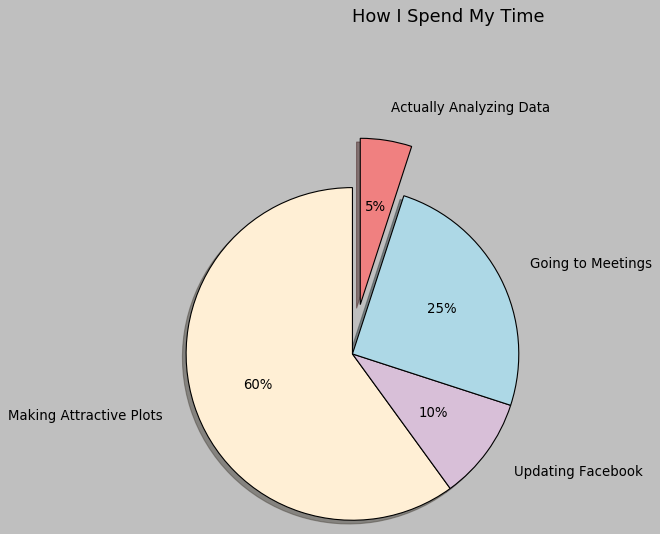

In [15]:
# The slices will be ordered and plotted counter-clockwise.
labels = 'Making Attractive Plots', 'Updating Facebook', 'Going to Meetings', 'Actually Analyzing Data'
sizes = [60, 10, 25, 5]
colors = ['papayawhip', 'thistle', 'lightblue', 'lightcoral']
explode = (0, 0, 0, 0.3) # make 4th slice 'explode'

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.0f%%', shadow=True, startangle=90, labeldistance=1.2)
# Set axis (aspect ratio) to 'equal' so pie is drawn flat
plt.axis('equal')
plt.text(0, 2, "How I Spend My Time", fontsize=16)
#plt.show()
plt.savefig('/tmp/piechart.pdf', format='pdf')

Basemap example 1 -- North America
----------------------------------

_this and the following adapted from_ http://matplotlib.org/basemap/users/examples.html

/Users/jstrick/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()


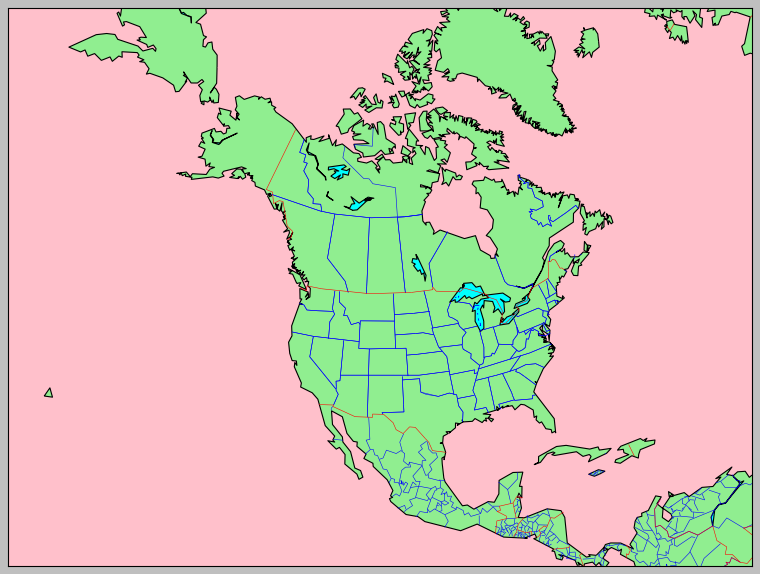

In [15]:
from mpl_toolkits.basemap import Basemap
# setup Lambert Conformal basemap.
m = Basemap(width=12000000,height=9000000,projection='lcc',
            resolution='c',lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)
# draw coastlines.
m.drawcoastlines()
# draw a boundary around the map, fill the background.
# this background will end up being the ocean color, since
# the continents will be drawn on top.
m.drawmapboundary(fill_color='pink')
# fill continents, set lake color same as ocean color.
m.fillcontinents(color='lightgreen',lake_color='aqua')
m.drawstates(color='blue')
m.drawcountries(color='red')
plt.gcf().set_size_inches(12, 10)
plt.show()

Basemap Example 2 -- The world
------------------------------
With contour plots

/Users/jstrick/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/Users/jstrick/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/Users/jstrick/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3505: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/jstrick/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3572: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    f

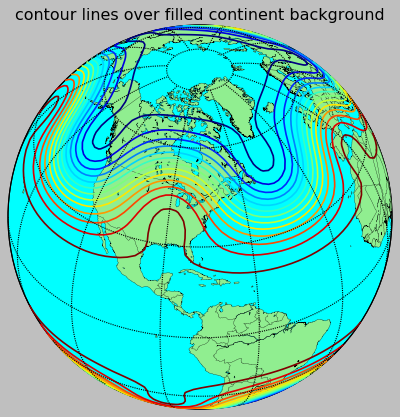

In [16]:
from mpl_toolkits.basemap import Basemap
# set up orthographic map projection with
# perspective of satellite looking down at 40N, 105W.
# use low resolution coastlines.
map = Basemap(projection='ortho',lat_0=39,lon_0=-78,resolution='l')  # center globe on Ft. Collins, CO

# draw coastlines, country boundaries, fill continents.
map.drawcoastlines(linewidth=0.25)
map.drawcountries(linewidth=0.25)
map.fillcontinents(color='lightgreen',lake_color='aqua')

# draw the edge of the map projection region (the projection limb)
map.drawmapboundary(fill_color='aqua')

# draw lat/lon grid lines every 30 degrees.
map.drawmeridians(np.arange(0,360,30))
map.drawparallels(np.arange(-90,90,30))

# make up some data on a regular lat/lon grid.
nlats = 73; nlons = 145; delta = 2.*np.pi/(nlons-1)
lats = (0.5*np.pi-delta*np.indices((nlats,nlons))[0,:,:])
lons = (delta*np.indices((nlats,nlons))[1,:,:])
wave = 0.75*(np.sin(2.*lats)**8*np.cos(4.*lons))
mean = 0.5*np.cos(2.*lats)*((np.sin(2.*lats))**2 + 2.)

# compute native map projection coordinates of lat/lon grid.
x, y = map(lons*180./np.pi, lats*180./np.pi)

# contour data over the map.
cs = map.contour(x,y,wave+mean,15,linewidths=1.5)
plt.title('contour lines over filled continent background')
plt.show()

Basemap example 3 -- US Precipitation
-------------------------------------
_data from_ http://water.weather.gov/precip/

/Users/jstrick/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/jstrick/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


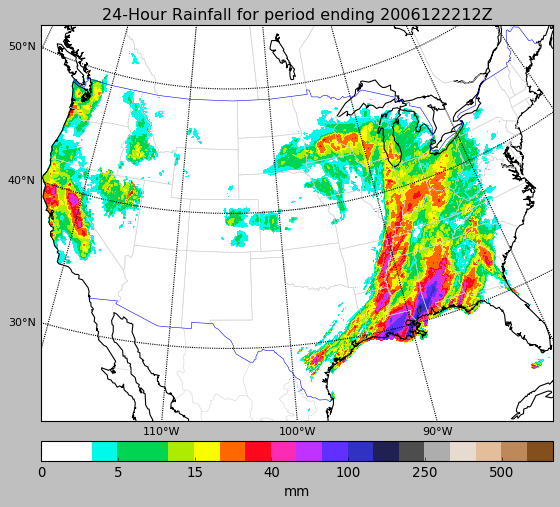

In [18]:
import os
from mpl_toolkits.basemap import Basemap, cm
# requires netcdf4-python (netcdf4-python.googlecode.com)
from netCDF4 import Dataset

DATA_DIR = '../DATA'

# plot rainfall from NWS using special precipitation
# colormap used by the NWS, and included in basemap.

nc = Dataset(os.path.join(DATA_DIR, 'nws_precip_conus_20061222.nc'))
# data from http://water.weather.gov/precip/
prcpvar = nc.variables['amountofprecip']
data = 0.01*prcpvar[:]
latcorners = nc.variables['lat'][:]
loncorners = -nc.variables['lon'][:]
lon_0 = -nc.variables['true_lon'].getValue()
lat_0 = nc.variables['true_lat'].getValue()
# create figure and axes instances
fig = plt.figure(figsize=(8,8))
ax = fig.add_axes([0.1,0.1,0.8,0.8])
# create polar stereographic Basemap instance.
m = Basemap(projection='stere',lon_0=lon_0,lat_0=90.,lat_ts=lat_0,\
            llcrnrlat=latcorners[0],urcrnrlat=latcorners[2],\
            llcrnrlon=loncorners[0],urcrnrlon=loncorners[2],\
            rsphere=6371200.,resolution='l',area_thresh=10000)
# draw coastlines, state and country boundaries, edge of map.
m.drawcoastlines()
m.drawstates(color='lightgrey')
m.drawcountries(color='blue')
# draw parallels.
parallels = np.arange(0.,90,10.)
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
# draw meridians
meridians = np.arange(180.,360.,10.)
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)
ny = data.shape[0]; nx = data.shape[1]
lons, lats = m.makegrid(nx, ny) # get lat/lons of ny by nx evenly space grid.
x, y = m(lons, lats) # compute map proj coordinates.
# draw filled contours.
clevs = [0,1,2.5,5,7.5,10,15,20,30,40,50,70,100,150,200,250,300,400,500,600,750]
cs = m.contourf(x,y,data,clevs,cmap=cm.s3pcpn)
# add colorbar.
cbar = m.colorbar(cs,location='bottom',pad="5%")
cbar.set_label('mm')
# add title
plt.title(prcpvar.long_name+' for period ending '+prcpvar.dateofdata)
plt.show()